## Energieconsumptie – Normaal Verdeeld

Het gemiddelde stroomverbruik van **6,8 kWh** wordt over een dag verdeeld met **random variatie per uur**, en met **invloed van tijdsblokken** zoals ochtend, middag, avond en nacht. Zo kun je bijvoorbeeld meer verbruik simuleren in de avond en minder ’s nachts, met wat willekeurige afwijking per uur om het realistisch te maken.

### Aanpak in stappen

#### 1. Dagindeling maken

Verdeel de dag in 24 uur, of groepeer het in blokken zoals:

- **Nacht** (00:00–06:00)  
- **Ochtend** (06:00–12:00)  
- **Middag** (12:00–18:00)  
- **Avond** (18:00–00:00)  

#### 2. Basisprofiel opstellen

Ken een relatief gewicht toe aan elk blok. Bijvoorbeeld:

- Nacht: **5%**  
- Ochtend: **25%**  
- Middag: **30%**  
- Avond: **40%**  

> Deze percentages moeten samen **100%** zijn.

#### 3. Verbruik per uur berekenen op basis van blokken

Gebruik de gewichten om het totale verbruik (6,8 kWh) over de uren te verdelen.  
Elk uur binnen een blok krijgt dan een **basisverbruik** op basis van het percentage, gedeeld door het aantal uren in dat blok.

#### 4. Willekeurige afwijking toevoegen

Voeg een **random variatie** toe per uur.  
Dit kun je bijvoorbeeld doen met een **normale verdeling** (`numpy.random.normal`) rond **1.0**, met een kleine standaarddeviatie (zoals **0.1**) om het te variëren zonder dat het te veel afwijkt.


Verbruik per uur (kWh):
00:00 - 0.06 kWh
01:00 - 0.06 kWh
02:00 - 0.06 kWh
03:00 - 0.07 kWh
04:00 - 0.05 kWh
05:00 - 0.05 kWh
06:00 - 0.35 kWh
07:00 - 0.32 kWh
08:00 - 0.26 kWh
09:00 - 0.31 kWh
10:00 - 0.26 kWh
11:00 - 0.26 kWh
12:00 - 0.35 kWh
13:00 - 0.24 kWh
14:00 - 0.25 kWh
15:00 - 0.31 kWh
16:00 - 0.29 kWh
17:00 - 0.36 kWh
18:00 - 0.39 kWh
19:00 - 0.36 kWh
20:00 - 0.55 kWh
21:00 - 0.44 kWh
22:00 - 0.46 kWh
23:00 - 0.36 kWh

Totaal verbruik: 6.48 kWh


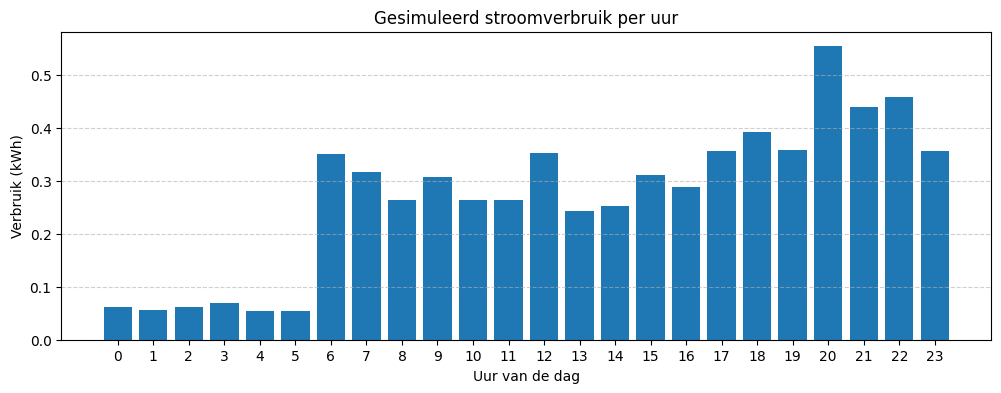

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Instellingen
gemiddeld_verbruik = 6.8  # kWh
dagdelen = {
    'nacht': {'uren': range(0, 6), 'percentage': 0.05},
    'ochtend': {'uren': range(6, 12), 'percentage': 0.25},
    'middag': {'uren': range(12, 18), 'percentage': 0.30},
    'avond': {'uren': range(18, 24), 'percentage': 0.40},
}

# Verbruik per uur zonder afwijking
basisverbruik_per_uur = np.zeros(24)
for deel, info in dagdelen.items():
    uren = info['uren']
    totaal_in_deel = info['percentage'] * gemiddeld_verbruik
    per_uur = totaal_in_deel / len(uren)
    for uur in uren:
        basisverbruik_per_uur[uur] = per_uur

# Random afwijking toevoegen (normale verdeling, gemiddeld 1.0)
np.random.seed(42)  # voor herhaalbaarheid
afwijking = np.random.normal(loc=1.0, scale=0.15, size=24)
simulatie = basisverbruik_per_uur * afwijking

# Resultaten
print("Verbruik per uur (kWh):")
for uur, waarde in enumerate(simulatie):
    print(f"{uur:02d}:00 - {waarde:.2f} kWh")

print(f"\nTotaal verbruik: {simulatie.sum():.2f} kWh")


# Plotten (optioneel)
plt.figure(figsize=(12, 4))
plt.bar(range(24), simulatie)
plt.title("Gesimuleerd stroomverbruik per uur")
plt.xlabel("Uur van de dag")
plt.ylabel("Verbruik (kWh)")
plt.xticks(range(24))
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()